## Plotting the results with python tools

To plot the results using Python you will need to install additional packages into 
your virtual environment.  Here's an example which uses `matplotlib` and 
the `pandas` package.

In [20]:
%matplotlib inline

import os
import matplotlib
import pandas as pd

# set matplotlib  style
matplotlib.style.use('ggplot')

# setup file path
archive_dir = './phenocamdata'
sitename = 'bartlettir'
roiname = 'DB_0001'
infile = "{}_{}_timeseries.csv".format(sitename, roiname)
inpath = os.path.join(archive_dir, sitename, 'ROI', infile)
print inpath

# read in file
with open(inpath,'r') as fd:
    df = pd.read_csv(fd, comment='#', parse_dates=[[0,1]])

# check the data
df.head()

./phenocamdata/bartlettir/ROI/bartlettir_DB_0001_timeseries.csv


,date_local_std_time,doy,filename,solar_elev,exposure,mask_index,gcc,rcc,r_mean,r_std,...,b_5_qtl,b_10_qtl,b_25_qtl,b_50_qtl,b_75_qtl,b_90_qtl,b_95_qtl,r_g_correl,g_b_correl,b_r_correl
0,2016-01-01 11:31:37,1,bartlettir_2016_01_01_113137.jpg,22.85398,NaN,4,0.35161,0.32339,88.88929,34.32057,...,48,53,62,75,106,151,177,0.97558,0.98391,0.96634
1,2016-01-01 11:41:07,1,bartlettir_2016_01_01_114107.jpg,22.94494,NaN,4,0.35386,0.32823,95.51360,34.76272,...,50,56,66,78,109,154,180,0.97437,0.98417,0.96673
2,2016-01-01 11:51:06,1,bartlettir_2016_01_01_115106.jpg,22.96461,NaN,4,0.35782,0.32147,89.03524,33.47085,...,48,54,63,75,105,148,173,0.97554,0.98388,0.96850
3,2016-01-01 12:01:07,1,bartlettir_2016_01_01_120107.jpg,22.90611,NaN,4,0.36137,0.30955,88.76445,34.32628,...,52,57,67,79,111,158,185,0.97364,0.98359,0.96433
4,2016-01-01 12:11:10,1,bartlettir_2016_01_01_121110.jpg,22.76886,NaN,4,0.36349,0.31359,95.62224,36.15216,...,54,60,70,83,116,164,192,0.97340,0.98386,0.96548


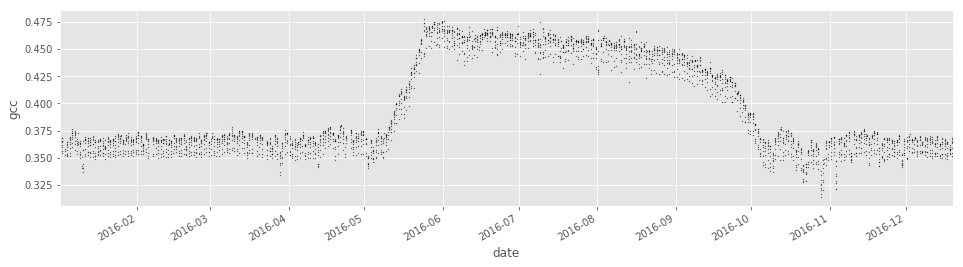

In [10]:
# plot the data frame gcc values
df.index = df.date_local_std_time
ax = df.gcc.plot(style='k.', markersize=.5, figsize=[16,4])
ax.set_ylabel('gcc')
ax.set_xlabel('date')

In [22]:
infile2 = "{}_{}_3day.csv".format(sitename, roiname)
inpath2 = os.path.join(archive_dir, sitename, 'ROI', infile2)

# read in file
print inpath
print inpath2
with open(inpath2,'r') as fd:
    df2 = pd.read_csv(fd, comment='#', parse_dates=[0])

# check the data
df2.head()

./phenocamdata/bartlettir/ROI/bartlettir_DB_0001_timeseries.csv
./phenocamdata/bartlettir/ROI/bartlettir_DB_0001_3day.csv


,date,year,doy,image_count,midday_filename,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,...,rcc_std,rcc_50,rcc_75,rcc_90,max_solar_elev,snow_flag,outlierflag_gcc_mean,outlierflag_gcc_50,outlierflag_gcc_75,outlierflag_gcc_90
0,2016-01-02,2016,2,21,bartlettir_2016_01_02_120108.jpg,90.50640,96.07558,76.63615,0.36500,0.34385,...,0.01626,0.32700,0.33595,0.34507,23.14451,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,2016,5,27,bartlettir_2016_01_05_120109.jpg,100.80369,104.49612,82.83121,0.36267,0.34985,...,0.01283,0.34208,0.34722,0.35265,23.46987,NaN,NaN,NaN,NaN,NaN
2,2016-01-08,2016,8,27,bartlettir_2016_01_08_120108.jpg,100.97640,105.38570,81.92808,0.36555,0.35026,...,0.02127,0.33793,0.34865,0.35372,23.86037,NaN,NaN,NaN,NaN,NaN
3,2016-01-11,2016,11,27,bartlettir_2016_01_11_120107.jpg,106.87376,108.24463,82.69013,0.36347,0.35887,...,0.01351,0.33079,0.34554,0.35273,24.31437,NaN,NaN,NaN,NaN,NaN
4,2016-01-14,2016,14,27,bartlettir_2016_01_14_120106.jpg,104.53924,107.53469,84.45921,0.36264,0.35254,...,0.01939,0.32917,0.34751,0.35505,24.83022,NaN,NaN,NaN,NaN,NaN


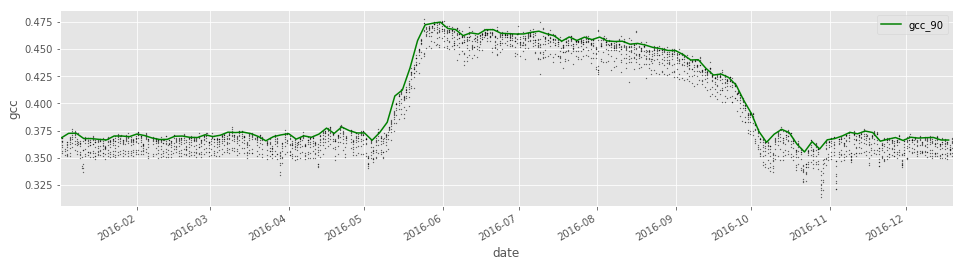

In [19]:
# plot the data frame gcc values
df.index = df.date_local_std_time
ax = df.gcc.plot(style='k.', markersize=.5, figsize=[16,4])
df2.plot('date','gcc_90', grid=True, style=['g'], ax=ax)
ax.set_ylabel('gcc')
ax.set_xlabel('date')